In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-60ba7e6fa171>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Last Updated'] = df_limpio['Last Updated'].str.extract(r'(\d{4})').astype(int)
<ipython-input-2-60ba7e6fa171>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_limpio = df_limpio.dropna(subset=['Rating'])[(df_limpio['Rating'] <= 5)]


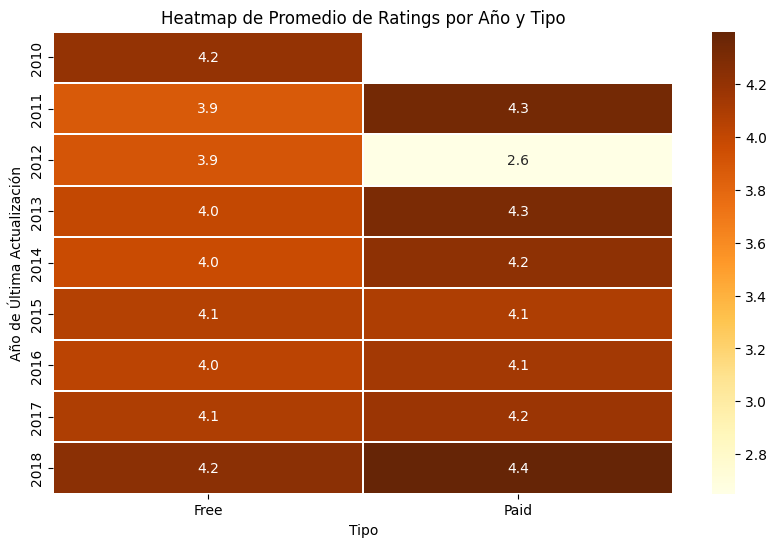

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Organizacion de datos/googleplaystore.csv')
# descarto las filas que tienen otro valor distinto a 'Free' o 'Paid' en la columna 'Type'
df_limpio = df[df['Type'].isin(['Free', 'Paid'])]
# me quedo solo con el año en que fue actualizada por ultima vez
df_limpio['Last Updated'] = df_limpio['Last Updated'].str.extract(r'(\d{4})').astype(int)
# me quedo solo con las filas que tienen un valor distinto de NaN en la columna 'Rating'
df_limpio = df_limpio.dropna(subset=['Rating'])[(df_limpio['Rating'] <= 5)]
tabla_pivot = df_limpio.pivot_table(values='Rating', index='Last Updated', columns='Type', aggfunc='mean')

paleta_cmap = sns.color_palette("YlOrBr", as_cmap=True)


plt.figure(figsize=(10, 6))
sns.heatmap(tabla_pivot, cmap=paleta_cmap, annot=True, fmt=".1f", linewidths=.2)
plt.title('Heatmap de Promedio de Ratings por Año y Tipo')
plt.xlabel('Tipo')
plt.ylabel('Año de Última Actualización')
plt.show()


